In [44]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

Ref.:ChatGPT:
If the CSV file contains missing values that Python does not automatically recognize, we can specify them explicitly using the **na_values** parameter. This allows us to define certain strings or symbols (e.g., "NA", "-", "null") as NaN, ensuring they are correctly treated as missing data in the DataFrame.

In [45]:
na_values = ["NA", "N/A", "-", "", " "]
data = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19,na_values=na_values)
data.sample(2)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
261,2018,6,15.0,28.9,5.7,19.5,10.5,54.1,0.7,7.2,53.0,198.9
91,2004,4,7.5,14.6,-0.3,10.7,4.3,95.5,-3.0,10.7,49.0,139.4


In [46]:
# Correlation between the mean temp. and the month.
corrtemp = data['month'].corr(data['meant'])
corrtemp

0.26100201022623015

In [47]:
#Filtering the data:
clean_data = data[['month','wdsp']]
clean_data.info()

#There some missing values to drop
clean_data.dropna(inplace=True)
clean_data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   338 non-null    int64  
 1   wdsp    336 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.4 KB


/var/folders/3h/x3pxm3dn0xj1s4jwb5vylr140000gn/T/ipykernel_86051/2046539361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.dropna(inplace=True)


,month,wdsp
72,9,7.4
44,5,9.3
22,7,9.8
130,7,7.8
176,5,13.8


In [48]:
corrtemp = clean_data['month'].corr(clean_data['wdsp'])
corrtemp

-0.19999237419389979

<Figure size 400x400 with 0 Axes>

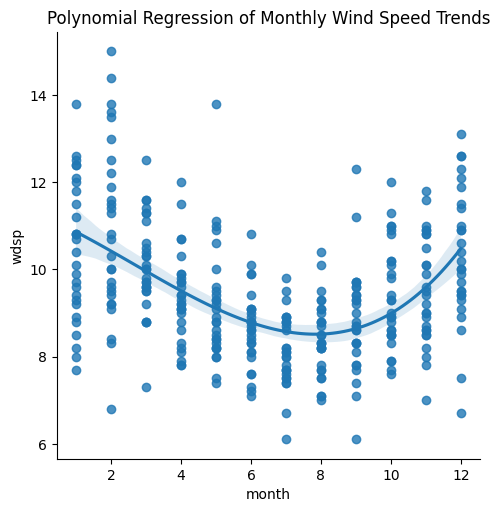

In [55]:
plt.figure(figsize=(4, 4))
sns.lmplot(x='month', y='wdsp',data=clean_data, order=3)
plt.title('Polynomial Regression of Monthly Wind Speed Trends')
plt.show()

The **order** parameter in **sns.lmplot()** specifies the degree of the polynomial regression model that you want to fit to the data. By default, sns.lmplot() performs a simple linear regression (a straight line) if no order is specified.<br>
* order=1: Fits a linear regression model (straight line).
* order=2: Fits a quadratic model (parabola shape).
* order=3: Fits a cubic model (curve with up to two bends).
* Higher orders: Allow for more complex curves but can lead to overfitting if set too high.